## Tools to work with Hessian Matrix code
#### N. McClure-Griffiths 27 July 2020
#### Developped for ASTR3005 students Callum Lynn & Janet Tang Semester 2, 2020


#### Table of contents
- [Load Data](#load)
- [Choose subcube](#sub_cube)
- [Hessian matrix of noise](#noise)   
- [Hessian matrix of data](#hessian)
- [Display](#display)


In [40]:
import os
import sys
from spectral_cube import SpectralCube

import aplpy
import pylab as plt
from matplotlib import rc
rc('mathtext',default='regular')
rc('xtick',direction='in')
rc('ytick',direction='in')
import numpy as np

from astropy.io import fits
from astropy import convolution
import astropy.units as u
from astropy.wcs import WCS
from astropy.utils import data
from astropy.wcs import WCS

sys.path.append('/Users/naomi/code/python/magnetar')
from hessiananalysis import HessianAnalysis


### Load the data
<a id="load"></a>

In [41]:
inpath = '/Users/naomi/Data/ASKAP/SMC_Pilot/'
outpath = '/Users/naomi/Research/HessianMatrix/'
filename = inpath+'SMC_askap_parkes_chans160_310_2.0_Jy.fits'
cube = SpectralCube.read(filename)
os.chdir(outpath)

In [42]:
print(cube)
vels=cube.spectral_axis 


SpectralCube with shape=(141, 4300, 4300) and unit=Jy / beam:
 n_x:   4300  type_x: RA---SIN  unit_x: deg    range:     3.474463 deg:  357.013920 deg
 n_y:   4300  type_y: DEC--SIN  unit_y: deg    range:   -76.093760 deg:  -67.955462 deg
 n_s:    141  type_s: VRAD      unit_s: m / s  range:    62398.475 m / s:  199149.209 m / s


In [43]:
print(vels[77].value/1000.)

123.93630556067001


INFO: Auto-setting vmin to -8.866e-03 [aplpy.core]
INFO: Auto-setting vmax to  6.349e-02 [aplpy.core]


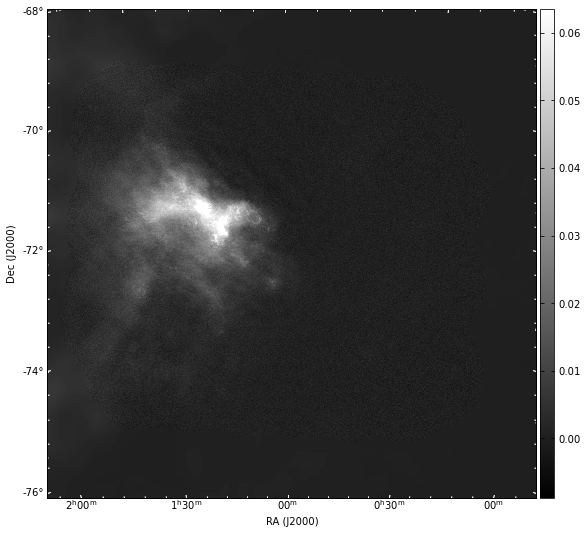

In [70]:
cube[1, :,:].quicklook()



In [51]:
# Open the cube as a fits file
hdu=fits.open(filename)
HI_cube=hdu[0].data
hdrREF=hdu[0].header
wcs = WCS(hdu[0].header)
hdu.close()


### Get a sub-section of cube
<a id="sub_cube"></a>

In [179]:
xy_slice = HI_cube[77,1500:2500,2500:3500]
#xy_slice = HI_cube[77,:,:]



### Calculate the matrix on the noise
<a id="noise"></a>

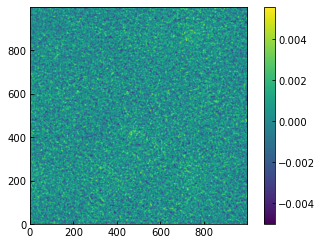

In [180]:
noise_slice = HI_cube[1,1500:2500,2500:3500]
#noise_slice = HI_cube[1,:,:]

plt.figure()
plt.imshow(noise_slice,origin='lower')
pylab.colorbar()

In [181]:
noise_eigen = HessianAnalysis(noise_slice, pxksz=5, mode='reflect')

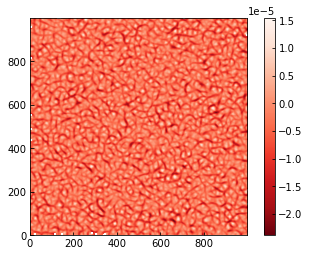

In [182]:
pylab.figure()
pylab.imshow(noise_eigen['lminus'],cmap='Reds_r',origin='lower')
pylab.colorbar()

### Calculate the Hessian on the data
<a id="hessian"></a>

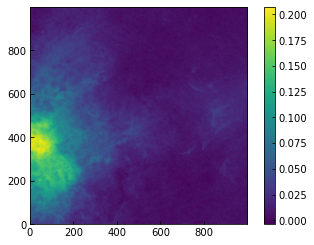

In [183]:
# Show the area
np.shape(xy_slice)
plt.figure()
#plt.subplot(projection=wcs,slices=(77,'x','y'))
plt.imshow(xy_slice,origin='lower')
#plt.grid(color='white', ls='solid')
pylab.colorbar()

In [184]:
data_eigen = HessianAnalysis(xy_slice, pxksz=5, mode='reflect')

In [185]:
# Create a mask based on the noise
noise_mask = np.copy(noise_eigen['lminus'])
noise_mask.fill(1)
noise_mask[data_eigen['lminus'] > noise_eigen['lminus']] = np.nan

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


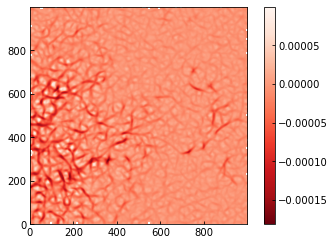

In [186]:
# Display lambda_minus
pylab.figure()
pylab.imshow(data_eigen['lminus'],cmap='Reds_r',origin='lower')
pylab.colorbar()

### Display the Lambda minus and theta values masked according to noise
<a id="display"></a>

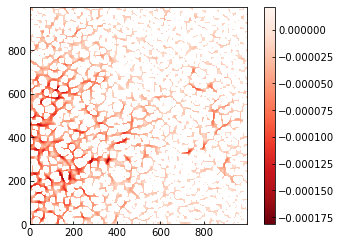

In [187]:
# Display lambda_minus, masked according to the noise
plt.figure()
plt.imshow(data_eigen['lminus']*noise_mask,cmap='Reds_r',origin='lower')
plt.colorbar()

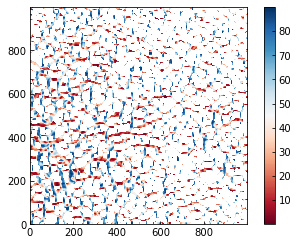

In [188]:
# Display theta, masked according to noise
plt.figure()
plt.imshow(np.abs(np.rad2deg(data_eigen['theta'])*noise_mask),cmap='RdBu',origin='lower')
plt.colorbar()